In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy.special import jn,spherical_jn

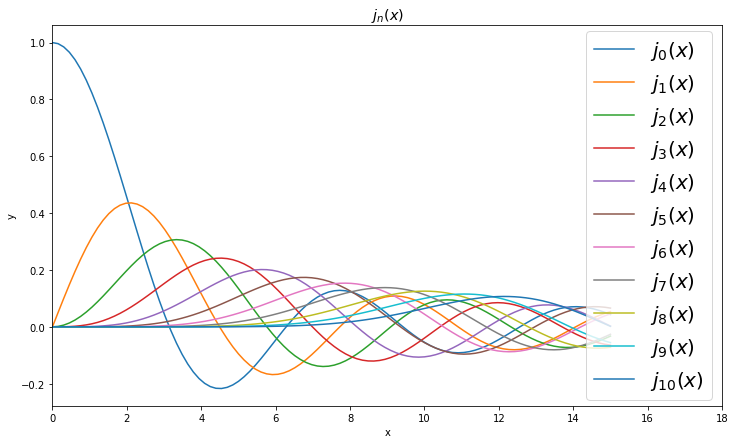

In [8]:
plt.figure(figsize = (12, 7))
x = linspace(0,15,100)
# fig,ax = plt.subplots()
plt.title("$j_{n}(x)$",fontsize='x-large',fontweight ='bold')
for n in range(11):
    plt.plot(x,spherical_jn(n,x),label=r"$j_{%d}(x)$" %n)
# ax.legend()
plt.xlim(0,18)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize = 20, loc = 'center right')
plt.savefig("/home/yunzheng/Downloads/LSS/J.png",format='png')

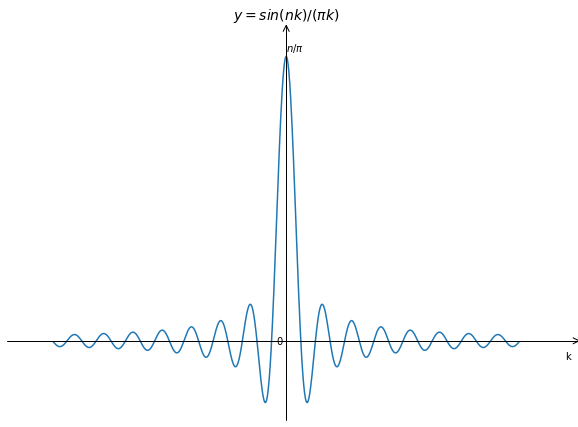

In [67]:
import mpl_toolkits.axisartist as axisartist
from mpl_toolkits.axisartist.axislines import Subplot # 注意Subplot第一字母大写
a=plt.figure(figsize=(10,7)) # 建立一个figure

ax=axisartist.Subplot(a,111)
a.add_subplot(ax) #将Subplot建立的坐标轴添加到figure a上

ax.axis[:].set_visible(False)
# ax.axis['right'].set_visible(False)
# ax.axis['top'].set_visible(False)
# ax.axis["x"].set_axisline_style('->') # 给y轴加一个箭头
# ax.axis["y"].set_axisline_style('->')

ax.axis["x"] = ax.new_floating_axis(0,0)
ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["x"].set_axis_direction('top')
ax.axis["y"].set_axis_direction('left')

ax.axis["x"].set_axisline_style('->',size = 1.5) # 给y轴加一个箭头
ax.axis["y"].set_axisline_style('->',size = 1.5)

x_1 = linspace(-1,1,1000)
# plt.title("$$")
y_1 = 1/np.pi *(np.sin(50*x_1)/x_1)


ax.plot(x_1,y_1)
plt.title('$y = sin(n k)/(\pi  k)  $',fontsize=14,pad=20)


ax.set_xticks([])
ax.set_yticks([0])
plt.xlim(-1.2,1.2)
plt.text(x=0,y=16.2,s="$n/\pi$")
plt.text(x=1.2,y=-1,s="k")
plt.savefig("/home/yunzheng/Downloads/LSS/deltafunction.png",format='png')

In [49]:
plt.text

<function matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)>

In [9]:
from scipy.integrate import quad
def integrand(x,n):
    return spherical_jn(n,x)
x_lower = 0
x_upper = 10000
val,abserr = quad(integrand,x_lower,x_upper,args=(10,),limit=5000)
print(val,abserr) 

0.38646810935258163 1.3697179483894943e-08


In [36]:
from scipy.special import gamma
gamma(10)

362880.0

In [81]:
np.sqrt(np.pi)*(gamma(5.5)/gamma(6))/2

0.38656315854718154

In [40]:
def Gamfunction(l):
    G = np.sqrt(np.pi) * gamma(0.5*(l+1)) * 0.5 / gamma(0.5*l +1)
    return G

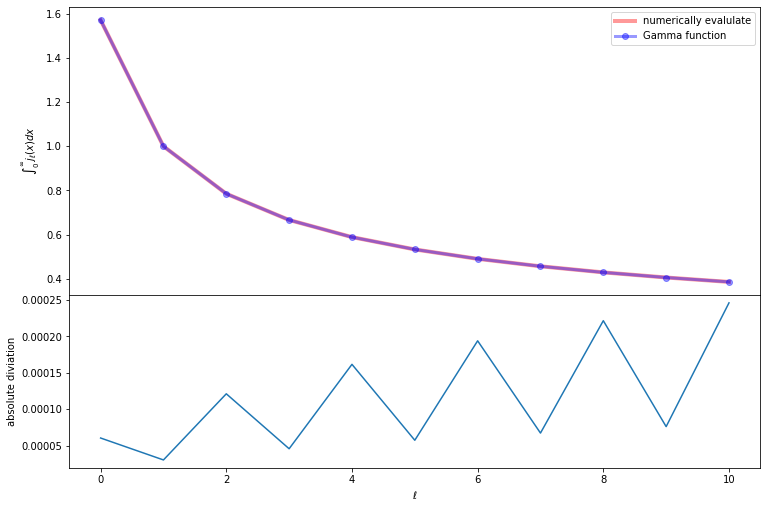

In [74]:
fig = plt.figure(figsize = (12,8))
plt.axis('off')
frame1 = fig.add_axes((0.1,0.4,0.8,0.5))
value = []
diviation = []
Gfunction = []
l = linspace(0,10,11)
for i in range(11):
    val,abserr = quad(integrand,x_lower,x_upper,args=(i,),limit=5000)
    div = abs((Gamfunction(i) - val) / Gamfunction(i))
    value.append(val)
    diviation.append(div)
# print(value)
plt.plot(l,value,c = 'r',label = r'numerically evalulate',linewidth = 4,alpha = 0.4)
plt.plot(l,Gamfunction(l),c= 'blue',marker='o',label = r'Gamma function',linewidth = 3,alpha = 0.4)
# print(div)
plt.ylabel('$\int_{0}^{\infty} j_{\ell}(x)dx$')
plt.legend()
frame1.set_xticklabels([])

frame2 = fig.add_axes((0.1,0.1,0.8,0.3))
plt.plot(l,diviation)
plt.xlabel('$\ell$')
plt.ylabel('absolute diviation')
plt.savefig("/home/yunzheng/Downloads/LSS/jl.png",format='png')

In [87]:
from scipy.integrate import quad
def integrand_2(x,n):
    m =  (spherical_jn(n,x))**2
    return m
x_lower = 0
x_upper = 10000
val,abserr = quad(integrand_2,x_lower,x_upper,args=(10,),limit=5000)
print(val,abserr) 

0.07474982359926821 1.4842926409073672e-08


In [88]:
def integ_2(l):
    G_2 = np.pi * 0.5 /(2*l + 1)
    return G_2

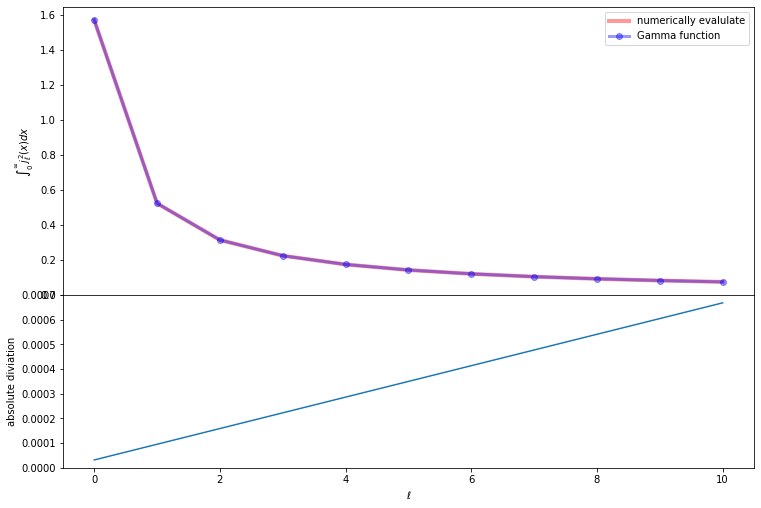

In [92]:
fig2 = plt.figure(figsize = (12,8))
plt.axis('off')
frame1 = fig2.add_axes((0.1,0.4,0.8,0.5))
value_2 = []
diviation_2 = []
integration_2 = []
l = linspace(0,10,11)
for i in range(11):
    val_2,abserr_2 = quad(integrand_2,x_lower,x_upper,args=(i,),limit=5000)
    div_2 = abs((integ_2(i) - val_2) / integ_2(i))
    value_2.append(val_2)
    diviation_2.append(div_2)
# print(value)
plt.plot(l,value_2,c = 'r',label = r'numerically evalulate',linewidth = 4,alpha = 0.4)
plt.plot(l,integ_2(l),c= 'blue',marker='o',label = r'Gamma function',linewidth = 3,alpha = 0.4)
# print(div)
plt.ylabel('$\int_{0}^{\infty} j_{\ell}^{2}(x)dx$')
plt.legend()
frame1.set_xticklabels([])

frame2 = fig2.add_axes((0.1,0.1,0.8,0.3))
plt.plot(l,diviation_2)
plt.xlabel('$\ell$')
plt.ylabel('absolute diviation')
plt.savefig("/home/yunzheng/Downloads/LSS/jl_2.png",format='png')

In [86]:
integ_2(l)

array([1.57079633, 0.52359878, 0.31415927, 0.22439948, 0.17453293,
       0.14279967, 0.12083049, 0.10471976, 0.09239978, 0.08267349,
       0.07479983])

In [90]:
value_2

[1.5707463253401375,
 0.5235487770532973,
 0.3141092639025009,
 0.22434947671261124,
 0.17448292373894428,
 0.14274966753061513,
 0.12078048520974508,
 0.10466975658111542,
 0.09234978245375106,
 0.08262349234944112,
 0.07474982359926821]